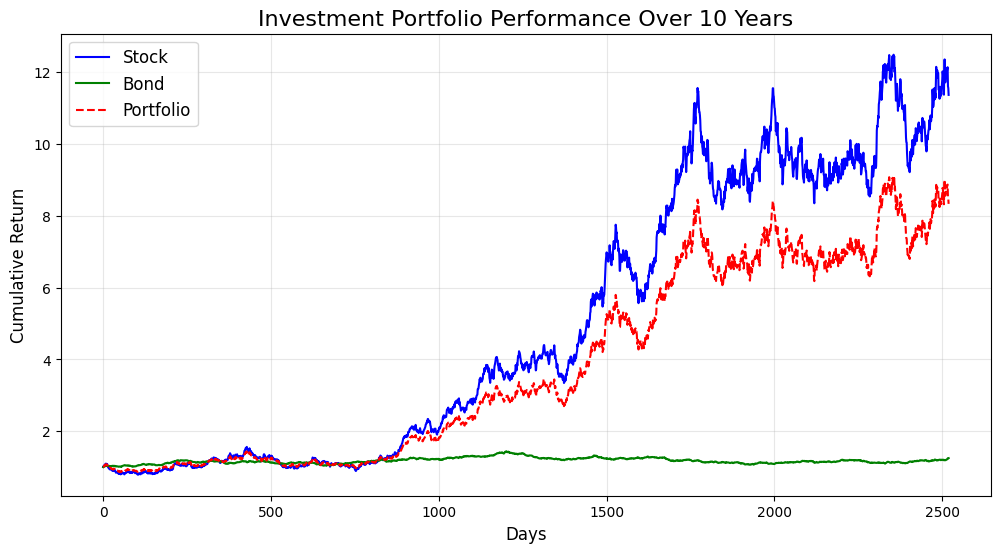

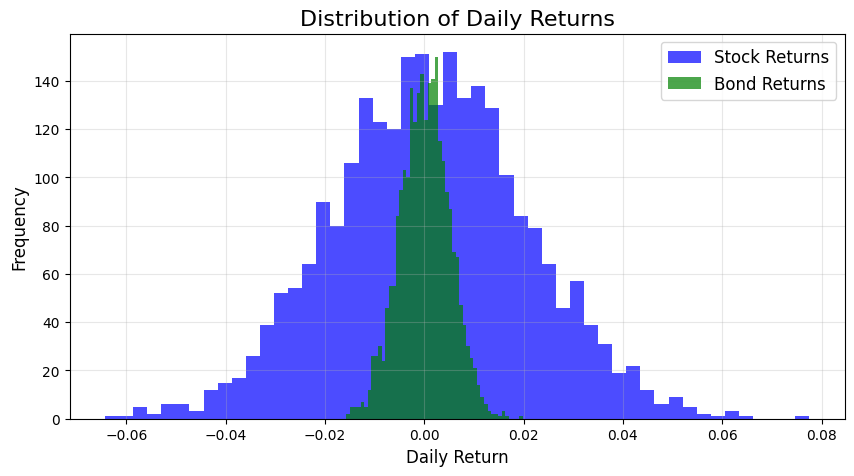

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果一致
np.random.seed(42)

# 1. 模拟参数设置
years = 10                    # 模拟 10 年数据
trading_days = 252 * years    # 每年 252 个交易日
stock_mean = 0.0005           # 股票日均回报率
stock_std = 0.02              # 股票日回报率波动性
bond_mean = 0.0002            # 债券日均回报率
bond_std = 0.005              # 债券日回报率波动性

# 2. 模拟股票和债券的日回报率
stock_returns = np.random.normal(stock_mean, stock_std, trading_days)
bond_returns = np.random.normal(bond_mean, bond_std, trading_days)

# 3. 计算累计回报
stock_cumulative = np.cumprod(1 + stock_returns)  # 股票累计回报
bond_cumulative = np.cumprod(1 + bond_returns)    # 债券累计回报

# 4. 投资组合权重及回报
stock_weight = 0.7                                # 70% 股票
bond_weight = 0.3                                 # 30% 债券
portfolio_cumulative = (stock_weight * stock_cumulative +
                        bond_weight * bond_cumulative)

# 5. 可视化
plt.figure(figsize=(12, 6))
plt.plot(stock_cumulative, label='Stock', color='blue', linewidth=1.5)
plt.plot(bond_cumulative, label='Bond', color='green', linewidth=1.5)
plt.plot(portfolio_cumulative, label='Portfolio', color='red', linestyle='--', linewidth=1.5)

# 图表美化
plt.title('Investment Portfolio Performance Over 10 Years', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 6. 分布可视化
plt.figure(figsize=(10, 5))
plt.hist(stock_returns, bins=50, alpha=0.7, color='blue', label='Stock Returns')
plt.hist(bond_returns, bins=50, alpha=0.7, color='green', label='Bond Returns')

# 图表美化
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [3]:
import numpy as np
import plotly.graph_objects as go

# 模拟参数
np.random.seed(42)
years = 10
trading_days = 252 * years
stock_returns = np.random.normal(0.0005, 0.02, trading_days)
bond_returns = np.random.normal(0.0002, 0.005, trading_days)

# 计算累计回报
stock_cumulative = np.cumprod(1 + stock_returns)
bond_cumulative = np.cumprod(1 + bond_returns)
portfolio_cumulative = 0.7 * stock_cumulative + 0.3 * bond_cumulative

# 创建图表
fig = go.Figure()

# 股票累计回报曲线
fig.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=stock_cumulative,
    mode='lines',
    name='Stock',
    line=dict(color='blue', width=2)
))

# 债券累计回报曲线
fig.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=bond_cumulative,
    mode='lines',
    name='Bond',
    line=dict(color='green', width=2)
))

# 投资组合累计回报曲线
fig.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=portfolio_cumulative,
    mode='lines',
    name='Portfolio',
    line=dict(color='red', width=2)
))

# 图表美化
fig.update_layout(
    title='Investment Portfolio Performance Over 10 Years',
    xaxis_title='Trading Days',
    yaxis_title='Cumulative Return',
    legend=dict(title='Asset'),
    template='plotly_white'
)

# 显示图表
fig.show()


In [4]:
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff

# 设置随机种子和模拟参数
np.random.seed(42)
years = 10
trading_days = 252 * years
stock_mean, stock_std = 0.0005, 0.02   # 股票的均值和波动率
bond_mean, bond_std = 0.0002, 0.005    # 债券的均值和波动率

# 模拟股票和债券的日回报率
stock_returns = np.random.normal(stock_mean, stock_std, trading_days)
bond_returns = np.random.normal(bond_mean, bond_std, trading_days)

# 计算累计回报
stock_cumulative = np.cumprod(1 + stock_returns)
bond_cumulative = np.cumprod(1 + bond_returns)
portfolio_cumulative = 0.7 * stock_cumulative + 0.3 * bond_cumulative  # 组合累计回报

# 绘制累计回报折线图
fig_cumulative = go.Figure()

# 股票
fig_cumulative.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=stock_cumulative,
    mode='lines',
    name='Stock',
    line=dict(color='blue', width=2)
))

# 债券
fig_cumulative.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=bond_cumulative,
    mode='lines',
    name='Bond',
    line=dict(color='green', width=2)
))

# 投资组合
fig_cumulative.add_trace(go.Scatter(
    x=np.arange(trading_days),
    y=portfolio_cumulative,
    mode='lines',
    name='Portfolio',
    line=dict(color='red', width=2, dash='dash')
))

# 设置布局
fig_cumulative.update_layout(
    title='Investment Portfolio Performance Over 10 Years',
    xaxis_title='Trading Days',
    yaxis_title='Cumulative Return',
    legend=dict(title='Asset'),
    template='plotly_white'
)

# 绘制日回报率分布图
fig_distribution = ff.create_distplot(
    [stock_returns, bond_returns], 
    group_labels=['Stock Returns', 'Bond Returns'],
    show_hist=True,
    show_rug=False,
    bin_size=0.001
)

# 设置布局
fig_distribution.update_layout(
    title='Distribution of Daily Returns',
    xaxis_title='Daily Return',
    yaxis_title='Density',
    legend=dict(title='Asset Type'),
    template='plotly_white'
)

# 显示图表
fig_cumulative.show()
fig_distribution.show()


In [7]:
import numpy as np
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# 设置随机种子和模拟参数
np.random.seed(42)
years = 10
trading_days = 252 * years
stock_mean, stock_std = 0.0005, 0.02   # 股票均值和波动率
bond_mean, bond_std = 0.0002, 0.005    # 债券均值和波动率

# 模拟股票和债券的日回报率
stock_returns = np.random.normal(stock_mean, stock_std, trading_days)
bond_returns = np.random.normal(bond_mean, bond_std, trading_days)

# 计算累计回报
stock_cumulative = np.cumprod(1 + stock_returns)
bond_cumulative = np.cumprod(1 + bond_returns)

# 创建 Dash 应用
app = dash.Dash(__name__)

# 应用布局
app.layout = html.Div([
    html.H1("Investment Portfolio Performance", style={'textAlign': 'center'}),
    
    # 滑动条组件
    html.Div([
        html.Label("Adjust Stock Weight (%):", style={'fontSize': '18px'}),
        dcc.Slider(
            id='weight-slider',
            min=0, max=100, step=1,
            marks={i: f'{i}%' for i in range(0, 101, 10)},
            value=70  # 默认值
        ),
        html.Div(id='weight-display', style={'marginTop': '10px', 'fontSize': '18px'})
    ], style={'width': '50%', 'margin': 'auto'}),
    
    # 图表
    dcc.Graph(id='portfolio-chart')
])

# 回调函数
@app.callback(
    [Output('portfolio-chart', 'figure'),
     Output('weight-display', 'children')],
    [Input('weight-slider', 'value')]
)
def update_portfolio_chart(stock_weight_percent):
    # 转换股票权重为小数
    stock_weight = stock_weight_percent / 100
    bond_weight = 1 - stock_weight
    
    # 计算组合累计回报
    portfolio_cumulative = (stock_weight * stock_cumulative +
                            bond_weight * bond_cumulative)
    
    # 创建图表
    fig = go.Figure()
    
    # 股票
    fig.add_trace(go.Scatter(
        x=np.arange(trading_days),
        y=stock_cumulative,
        mode='lines',
        name='Stock',
        line=dict(color='blue', width=2)
    ))
    
    # 债券
    fig.add_trace(go.Scatter(
        x=np.arange(trading_days),
        y=bond_cumulative,
        mode='lines',
        name='Bond',
        line=dict(color='green', width=2)
    ))
    
    # 投资组合
    fig.add_trace(go.Scatter(
        x=np.arange(trading_days),
        y=portfolio_cumulative,
        mode='lines',
        name=f'Portfolio ({stock_weight_percent}% Stock, {100-stock_weight_percent}% Bond)',
        line=dict(color='red', width=2)
    ))
    
    # 图表布局
    fig.update_layout(
        title='Investment Portfolio Performance Over 10 Years',
        xaxis_title='Trading Days',
        yaxis_title='Cumulative Return',
        legend=dict(title='Asset'),
        template='plotly_white'
    )
    
    # 更新显示权重
    weight_text = f"Current Allocation: {stock_weight_percent}% Stock, {100-stock_weight_percent}% Bond"
    
    return fig, weight_text

# 运行应用
if __name__ == '__main__':
    app.run_server(debug=True)


In [10]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objs as go
import dash_table
import pandas as pd
import numpy as np

# 创建 Dash 应用
app = dash.Dash(__name__)

# 模拟的数据
np.random.seed(42)
years = [i for i in range(2014, 2024)]
stock_returns = np.random.normal(0.05, 0.1, 10).round(4)
bond_returns = np.random.normal(0.02, 0.03, 10).round(4)
portfolio_returns = np.random.normal(0.03, 0.05, 10).round(4)

# 生成数据表
data = {
    'Year': years,
    'Stock Return': stock_returns,
    'Bond Return': bond_returns,
    'Portfolio Return': portfolio_returns,
}

df = pd.DataFrame(data)

# 应用布局
app.layout = html.Div([
    html.H1("Investment Portfolio Analysis", style={'textAlign': 'center'}),
    
    # 数据表格
    dash_table.DataTable(
        id='return-table',
        columns=[
            {'name': 'Year', 'id': 'Year'},
            {'name': 'Stock Return', 'id': 'Stock Return'},
            {'name': 'Bond Return', 'id': 'Bond Return'},
            {'name': 'Portfolio Return', 'id': 'Portfolio Return'},
        ],
        data=df.to_dict('records'),
        style_table={'height': '350px', 'overflowY': 'auto'},
        style_cell={'padding': '5px', 'textAlign': 'center'},
        page_size=10,
        filter_action='native',  # 允许数据过滤
        sort_action='native',    # 允许排序
        editable=True,           # 允许编辑单元格
    ),
    
    # 日期选择器
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date='2020-01-01',
        end_date='2023-01-01',
        display_format='YYYY-MM-DD'
    ),
    
    # 股票、债券和组合的月度回报图
    dcc.Graph(id='monthly-return-graph'),
    
    # 年度回报与波动性对比
    dcc.Graph(id='annual-return-graph'),
    
    # 控件：选择显示的图表
    dcc.Dropdown(
        id='chart-dropdown',
        options=[
            {'label': 'Monthly Returns', 'value': 'monthly'},
            {'label': 'Annual Returns & Volatility', 'value': 'annual'}
        ],
        value='monthly',  # 默认选项
        style={'width': '50%', 'margin': 'auto'}
    ),
    
    # 用户输入年化回报和风险
    dcc.Input(id='expected-return', type='number', value=0.05, debounce=True, placeholder="Enter Expected Return"),
    dcc.Input(id='risk-tolerance', type='number', value=0.10, debounce=True, placeholder="Enter Risk Tolerance"),
    
    html.Button('Analyze', id='analyze-button', n_clicks=0),
    
    html.Div(id='analysis-output')
])

# 回调函数：根据用户输入更新图表
@app.callback(
    Output('monthly-return-graph', 'figure'),
    Output('annual-return-graph', 'figure'),
    Output('filtered-portfolio-graph', 'figure'),
    [Input('chart-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('expected-return', 'value'),
     Input('risk-tolerance', 'value')]
)
def update_charts(chart_type, start_date, end_date, expected_return, risk_tolerance):
    # 根据选择的图表类型更新内容
    if chart_type == 'monthly':
        fig_monthly = go.Figure()
        fig_monthly.add_trace(go.Scatter(x=np.arange(1, 13), y=np.random.normal(0.02, 0.05, 12), mode='lines', name='Stock'))
        fig_monthly.update_layout(title="Monthly Returns of Stock and Bond", xaxis_title="Month", yaxis_title="Return")
    else:
        fig_monthly = go.Figure()

    if chart_type == 'annual':
        fig_annual = go.Figure()
        fig_annual.add_trace(go.Bar(x=['Stock', 'Bond', 'Portfolio'], y=[0.07, 0.03, 0.05], name='Annual Return'))
        fig_annual.add_trace(go.Bar(x=['Stock', 'Bond', 'Portfolio'], y=[0.12, 0.05, 0.07], name='Volatility'))
        fig_annual.update_layout(title="Annual Returns and Volatility", barmode='group', xaxis_title="Asset", yaxis_title="Value")
    else:
        fig_annual = go.Figure()
    
    # 这里是日期范围筛选的示例
    filtered_data = portfolio_returns  # 按需修改
    fig_filtered = go.Figure()
    fig_filtered.add_trace(go.Scatter(
        x=np.arange(len(filtered_data)),
        y=filtered_data,
        mode='lines',
        name='Filtered Portfolio'
    ))
    fig_filtered.update_layout(title="Filtered Portfolio Performance", xaxis_title="Date", yaxis_title="Cumulative Return")

    # 风险/回报分析
    if expected_return and risk_tolerance:
        portfolio_return = expected_return - risk_tolerance
        portfolio_risk = risk_tolerance * 2
        analysis_output = f"Expected Portfolio Return: {portfolio_return*100:.2f}%, Portfolio Risk: {portfolio_risk*100:.2f}%"
    else:
        analysis_output = "Please enter valid values."

    return fig_monthly, fig_annual, fig_filtered, analysis_output

# 启动应用
if __name__ == '__main__':
    app.run_server(debug=True)
